# <h1 align='center'>Airline Customer Satisfaction</h1>

<h2>Project Guideline</h2>

- Data yang digunakan adalah data dari link : [marketing_campaign.csv](https://drive.google.com/drive/folders/1OC22Wwt0wRz4_JPzb7a1bZ2tZL3rXqIz?usp=share_link)
- Tujuannya adalah untuk menganalisis kepuasan penumpang terhadap layanan pesawat sebuah perusahaan
- Membuat prediksi (Machine Learning Classification) apakah penumpang puas atau tidak dengan pelayanan kita
- Melakukan descriptive analisis untuk mengetahui apa saja yang terjadi dalam data ini
- Melakukan penggalian insight dari data, Semakin banyak insight maka akan semakin bagus
- Cari sebanyak2 nya insight / informasi yang sekiranya berguna bagi stakeholder melalui data ini
- Cleaning data (membersihkan data kotor)
- Exploratory Data Analysis (Menampilkan Insight atau informasi penting dari data menggunakan visualisasi, untuk masing-masing visualisasi diberi penjelasan)
- Data preprocessing (split data, standardization)
- Modelling (Bebas menggunakan algoritma apapun, bebas explore algoritma dari github, paper dsb, minimal menggunakan 2 model)
- Menampilkan evaluasi model (Akurasi, recall, precision,f1-score)

**kumpulkan hasil analisis dalam format ipynb & poster infografis*

<h2>About Dataset</h2>

This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction?

**Content**:

|  Column | Description |
|  --- | --- |  
| `Gender` | Gender of the passengers (Female, Male) |
| `Customer Type` | The customer type (Loyal customer, disloyal customer) |
| `Age` | The actual age of the passengers |
| `Type of Travel` | Purpose of the flight of the passengers (Personal Travel, Business Travel) |
| `Class` | Travel class in the plane of the passengers (Business, Eco, Eco Plus) |
| `Flight distance` | The flight distance of this journey |
| `Inflight wifi service` | Satisfaction level of the inflight wifi service (0:Not Applicable;1-5) |
| `Departure/Arrival time convenient` | Satisfaction level of Departure/:Arrival time convenient |
| `Ease of Online booking` | Satisfaction level of online booking |
| `Gate location` | Satisfaction level of Gate location |
| `Food and drink` | Satisfaction level of Food and drink |
| `Online boarding` | Satisfaction level of online boarding |
| `Seat comfort` | Satisfaction level of Seat comfort |
| `Inflight entertainment` | Satisfaction level of inflight entertainment |
| `On-board service` | Satisfaction level of On-board service |
| `Leg room service` | Satisfaction level of Leg room service |
| `Baggage handling` | Satisfaction level of baggage handling |
| `Check-in service` | Satisfaction level of Check-in service |
| `Inflight service` | Satisfaction level of inflight service |
| `Cleanliness` | Satisfaction level of Cleanliness |
| `Departure Delay in Minutes` | Minutes delayed when departure |
| `Arrival Delay in Minutes` | Minutes delayed when Arrival |
| `Satisfaction` | Airline satisfaction level(Satisfaction, neutral or dissatisfaction) |

<h2>Outline Project Flow</h2>

- Step 1: Import & Understand The Data
- Step 2: Data Wrangling
- Step 3: Exploratory Data Analysis
- Step 4: Train Model
- Step 5: Test Model


## Step 1: Import & Understand The Data

<h3>1.1 Import libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# Import preprocessing libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Import classification models and evaluation metrics
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Set option to display all columns on dataframe
pd.options.display.max_columns = None

<h3>1.2 Read and display data

In [ ]:
train = pd.read_csv('drive/MyDrive/Data For Colab/train.csv')
test = pd.read_csv('drive/MyDrive/Data For Colab/test.csv')

In [ ]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


<h3>1.3 Combine the data

In [ ]:
df = pd.concat([train, test], axis=0, ignore_index=True)

print('Total data on train df:', len(train))
print('Total data on test df:', len(test))
print('Total data after combined:', len(train)+len(test))

Total data on train df: 103904
Total data on test df: 25976
Total data after combined: 129880


<h3>1.4 Identify missing or duplicated columns

In [ ]:
train_missing = train[train.columns[train.isna().sum() > 0]]
test_missing = test[test.columns[test.isna().sum() > 0]]

print('Train data missing value:')
print(train_missing.isna().sum().to_string())
print('\nTest data missing value:')
print(test_missing.isna().sum().to_string())
print('\nTrain duplicated rows:', train.duplicated().sum())
print('\nTest duplicated rows:', test.duplicated().sum())

Train data missing value:
Arrival Delay in Minutes    310

Test data missing value:
Arrival Delay in Minutes    83

Train duplicated rows: 0

Test duplicated rows: 0


<h3>1.5 Summarize statistics & info of the data

In [ ]:
train.describe(include='all')

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103904.000000,103904.000000,103904,103904,103904.000000,103904,103904,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000,103904
unique,NaN,NaN,2,2,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied
freq,NaN,NaN,52727,84923,NaN,71655,49665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58879
mean,51951.500000,64924.210502,NaN,NaN,39.379706,NaN,NaN,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678,NaN
std,29994.645522,37463.812252,NaN,NaN,15.114964,NaN,NaN,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682,NaN
min,0.000000,1.000000,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,25975.750000,32533.750000,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,NaN
50%,51951.500000,64856.500000,NaN,NaN,40.000000,NaN,NaN,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,NaN
75%,77927.250000,97368.250000,NaN,NaN,51.000000,NaN,NaN,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,NaN


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

<h3>Summary of step 1:</h3>

- By combining the train and test data, which have the same format, we can make data preparation much easier. Later, we can split the combined data back into their respective original data frames.
- There are two unnecessary columns in the data frame. The first column, `Unnamed: 0` contains index numbers, while the second column, `id` contains numbers used to identify each customer.
- The data frame consists of 4 numeric features, 18 categorical features, and 1 label variable.
- The type of case used in the data frame is inconsistent.
- The data frame is not in the correct dtype format.
- The variables from `Inflight wifi service` to `Cleanliness` should range from 1 to 5 since 0 is not applicable based on the context provided. Thus, it should be considered a missing value.

## Step 2: Data Wrangling

### Data Cleaning

<h3>2.1 Rename columns & convert words to proper case</h3>

In [ ]:
# Replace spaces with underscores in columns name
df.columns = df.columns.str.replace(' ', '_')

# Applying proper case for entire dataframe
df.columns = df.columns.str.title()
df = df.applymap(lambda x: x.title() if isinstance(x, str) else x)

df.head(3)

,Unnamed:_0,Id,Gender,Customer_Type,Age,Type_Of_Travel,Class,Flight_Distance,Inflight_Wifi_Service,Departure/Arrival_Time_Convenient,Ease_Of_Online_Booking,Gate_Location,Food_And_Drink,Online_Boarding,Seat_Comfort,Inflight_Entertainment,On-Board_Service,Leg_Room_Service,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Departure_Delay_In_Minutes,Arrival_Delay_In_Minutes,Satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,Neutral Or Dissatisfied
1,1,5047,Male,Disloyal Customer,25,Business Travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,Neutral Or Dissatisfied
2,2,110028,Female,Loyal Customer,26,Business Travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,Satisfied


<h3>2.2 Drop irrelevant columns</h3>

In [ ]:
df = df.drop(['Unnamed:_0', 'Id'], axis=1)

df.head(3)

,Gender,Customer_Type,Age,Type_Of_Travel,Class,Flight_Distance,Inflight_Wifi_Service,Departure/Arrival_Time_Convenient,Ease_Of_Online_Booking,Gate_Location,Food_And_Drink,Online_Boarding,Seat_Comfort,Inflight_Entertainment,On-Board_Service,Leg_Room_Service,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Departure_Delay_In_Minutes,Arrival_Delay_In_Minutes,Satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,Neutral Or Dissatisfied
1,Male,Disloyal Customer,25,Business Travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,Neutral Or Dissatisfied
2,Female,Loyal Customer,26,Business Travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,Satisfied


<h3>2.3 Handling missing value</h3>

In [ ]:
missing_train_mode = train['Arrival Delay in Minutes'].value_counts().head(1).to_string()
missing_test_mode = test['Arrival Delay in Minutes'].value_counts().head(1).to_string()

print(missing_train_mode)
print(missing_test_mode)

0.0    58159
0.0    14594


In [ ]:
df = df.fillna(0)

print('Missing value:', df.isna().sum().sum())

Missing value: 0


In [ ]:
columns = list(df.loc[:, 'Inflight_Wifi_Service':'Cleanliness'])

df = df.loc[~(df[columns] == 0).any(axis=1)]

print('Rating features minimum value:')
print(df[columns].min().to_string())
print('\nRating features maximum value:')
print(df[columns].max().to_string())

Rating features minimum value:
Inflight_Wifi_Service                1
Departure/Arrival_Time_Convenient    1
Ease_Of_Online_Booking               1
Gate_Location                        1
Food_And_Drink                       1
Online_Boarding                      1
Seat_Comfort                         1
Inflight_Entertainment               1
On-Board_Service                     1
Leg_Room_Service                     1
Baggage_Handling                     1
Checkin_Service                      1
Inflight_Service                     1
Cleanliness                          1

Rating features maximum value:
Inflight_Wifi_Service                5
Departure/Arrival_Time_Convenient    5
Ease_Of_Online_Booking               5
Gate_Location                        5
Food_And_Drink                       5
Online_Boarding                      5
Seat_Comfort                         5
Inflight_Entertainment               5
On-Board_Service                     5
Leg_Room_Service                     5
B

<h3>2.4 Convert columns to the correct type</h3>

In [ ]:
# Group list of features based on their dtypes
categorical_features = ['Gender', 'Customer_Type', 'Type_Of_Travel', 'Class', 'Satisfaction']
numeric_features = [col for col in df.columns if col not in categorical_features]

df[categorical_features] = df[categorical_features].astype('category')
df['Arrival_Delay_In_Minutes'] = df['Arrival_Delay_In_Minutes'].astype('int')

print(df.dtypes.to_string())

Gender                               category
Customer_Type                        category
Age                                     int64
Type_Of_Travel                       category
Class                                category
Flight_Distance                         int64
Inflight_Wifi_Service                   int64
Departure/Arrival_Time_Convenient       int64
Ease_Of_Online_Booking                  int64
Gate_Location                           int64
Food_And_Drink                          int64
Online_Boarding                         int64
Seat_Comfort                            int64
Inflight_Entertainment                  int64
On-Board_Service                        int64
Leg_Room_Service                        int64
Baggage_Handling                        int64
Checkin_Service                         int64
Inflight_Service                        int64
Cleanliness                             int64
Departure_Delay_In_Minutes              int64
Arrival_Delay_In_Minutes          

<h3>2.5 Split unproscess train data to explore</h3>

Calculating train data index

In [ ]:
columns = list(train.loc[:, 'Inflight wifi service':'Cleanliness'])

# Filter rows that contain missing value
rows_dropped = train.loc[(train[columns] == 0).any(axis=1)]

train_size = len(train)
dropped = round((len(rows_dropped) / len(train)) * 100)

print(f'{dropped}% data are dropped out of {train_size} data')

8% data are dropped out of 103904 data


In [ ]:
# Calculating train data row index
split_index = len(train) - len(rows_dropped)

# Select train data to explore
explore_df = df.iloc[:split_index, :]

Make sure train data is correct by comparing index number to the original data

In [ ]:
train.tail(2)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,3,3,1,1,1,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [ ]:
explore_df.tail(2)

,Gender,Customer_Type,Age,Type_Of_Travel,Class,Flight_Distance,Inflight_Wifi_Service,Departure/Arrival_Time_Convenient,Ease_Of_Online_Booking,Gate_Location,Food_And_Drink,Online_Boarding,Seat_Comfort,Inflight_Entertainment,On-Board_Service,Leg_Room_Service,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Departure_Delay_In_Minutes,Arrival_Delay_In_Minutes,Satisfaction
103902,Female,Disloyal Customer,22,Business Travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0,Neutral Or Dissatisfied
103903,Male,Loyal Customer,27,Business Travel,Business,1723,1,3,3,3,1,1,1,1,1,1,4,4,3,1,0,0,Neutral Or Dissatisfied


The data is clean and ready to explore!

<h3>Summary Data cleaning:</h3>

- Renaming column so it easy to work with
- Convert word to proper case so it clean and consistent
- Drop irrelevant columns
- Identify, replace and drop missing value
- Convert columns to the correct dtypes
- Split unproscess train data to explore

### Data Preprocessing

<h3>2.6 Turning catagorical value</h3>

In [ ]:
dummies_cols = ['Gender', 'Customer_Type', 'Type_Of_Travel']

# Nominal
df = pd.get_dummies(df, columns=dummies_cols)

# Ordinal
df['Class'] = df['Class'].map({'Eco': 0, 'Eco Plus': 1, 'Business': 2})

# Target Classification
df['Satisfaction'] = df['Satisfaction'].map({'Neutral Or Dissatisfied': 0, 'Satisfied': 1})

In [ ]:
# Reorder the columns so satisfaction stay at the end of dataframe
reorder_cols = [col for col in df.columns if col not in ['Satisfaction', 'Age', 'Class', 'Flight_Distance']] + ['Age', 'Class', 'Flight_Distance', 'Satisfaction']
df = df[reorder_cols]

In [ ]:
df.head()

,Inflight_Wifi_Service,Departure/Arrival_Time_Convenient,Ease_Of_Online_Booking,Gate_Location,Food_And_Drink,Online_Boarding,Seat_Comfort,Inflight_Entertainment,On-Board_Service,Leg_Room_Service,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Departure_Delay_In_Minutes,Arrival_Delay_In_Minutes,Gender_Female,Gender_Male,Customer_Type_Disloyal Customer,Customer_Type_Loyal Customer,Type_Of_Travel_Business Travel,Type_Of_Travel_Personal Travel,Age,Class,Flight_Distance,Satisfaction
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18,0,1,0,1,0,1,13,1,460,0
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6,0,1,1,0,1,0,25,2,235,0
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0,1,0,0,1,1,0,26,2,1142,1
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9,1,0,0,1,1,0,25,2,562,0
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0,0,1,0,1,1,0,61,2,214,1


<h3>2.7 Features scaling</h3>

In [ ]:
scaler = MinMaxScaler()

col = df.columns.to_list()

df[col] = scaler.fit_transform(df[col])

In [ ]:
df

,Inflight_Wifi_Service,Departure/Arrival_Time_Convenient,Ease_Of_Online_Booking,Gate_Location,Food_And_Drink,Online_Boarding,Seat_Comfort,Inflight_Entertainment,On-Board_Service,Leg_Room_Service,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Departure_Delay_In_Minutes,Arrival_Delay_In_Minutes,Gender_Female,Gender_Male,Customer_Type_Disloyal Customer,Customer_Type_Loyal Customer,Type_Of_Travel_Business Travel,Type_Of_Travel_Personal Travel,Age,Class,Flight_Distance,Satisfaction
0,0.50,0.75,0.50,0.00,1.00,0.50,1.00,1.00,0.75,0.50,0.75,0.75,1.00,1.00,0.015704,0.011364,0.0,1.0,0.0,1.0,0.0,1.0,0.076923,0.5,0.086632,0.0
1,0.50,0.25,0.50,0.50,0.00,0.50,0.00,0.00,0.00,1.00,0.50,0.00,0.75,0.00,0.000628,0.003788,0.0,1.0,1.0,0.0,1.0,0.0,0.230769,1.0,0.041195,0.0
2,0.25,0.25,0.25,0.25,1.00,1.00,1.00,1.00,0.75,0.50,0.75,0.75,0.75,1.00,0.000000,0.000000,1.0,0.0,0.0,1.0,1.0,0.0,0.243590,1.0,0.224354,1.0
3,0.25,1.00,1.00,1.00,0.25,0.25,0.25,0.25,0.25,1.00,0.50,0.00,0.75,0.25,0.006910,0.005682,1.0,0.0,0.0,1.0,1.0,0.0,0.230769,1.0,0.107229,0.0
4,0.50,0.50,0.50,0.50,0.75,1.00,1.00,0.50,0.50,0.75,0.75,0.50,0.50,0.50,0.000000,0.000000,0.0,1.0,0.0,1.0,1.0,0.0,0.692308,1.0,0.036955,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0.50,0.50,0.50,0.00,0.75,0.50,0.75,0.75,0.50,0.25,0.75,0.75,1.00,0.75,0.000000,0.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.346154,1.0,0.099960,0.0
129876,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,1.00,1.00,1.00,1.00,0.75,0.000000,0.000000,0.0,1.0,0.0,1.0,1.0,0.0,0.205128,1.0,0.124192,1.0
129877,0.25,1.00,0.00,1.00,0.25,0.00,0.25,0.25,0.75,0.50,0.75,1.00,0.75,0.25,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.128205,0.0,0.160945,0.0
129878,0.50,0.50,0.50,0.50,0.75,0.75,0.75,0.75,0.50,0.25,1.00,0.75,1.00,0.75,0.000000,0.000000,0.0,1.0,0.0,1.0,1.0,0.0,0.089744,1.0,0.221325,1.0


The data is ready to train and fit to the model!

<h3>2.8 Split final data to their original group</h3>

In [ ]:
train_df = df.iloc[:split_index, :]
test_df = df.iloc[split_index:, :]

In [ ]:
train_df.tail()

,Inflight_Wifi_Service,Departure/Arrival_Time_Convenient,Ease_Of_Online_Booking,Gate_Location,Food_And_Drink,Online_Boarding,Seat_Comfort,Inflight_Entertainment,On-Board_Service,Leg_Room_Service,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Departure_Delay_In_Minutes,Arrival_Delay_In_Minutes,Gender_Female,Gender_Male,Customer_Type_Disloyal Customer,Customer_Type_Loyal Customer,Type_Of_Travel_Business Travel,Type_Of_Travel_Personal Travel,Age,Class,Flight_Distance,Satisfaction
103899,0.25,0.00,0.25,0.50,0.25,0.25,0.25,0.25,0.50,0.00,0.75,0.25,0.50,0.25,0.001884,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.205128,0.0,0.032512,0.0
103900,0.75,0.75,0.75,0.75,0.25,0.75,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.75,0.000000,0.000000,0.0,1.0,0.0,1.0,1.0,0.0,0.538462,1.0,0.467690,1.0
103901,0.00,0.00,0.00,0.50,0.75,0.00,1.00,0.75,0.50,0.25,0.75,1.00,1.00,0.75,0.004397,0.008838,0.0,1.0,1.0,0.0,1.0,0.0,0.294872,1.0,0.396607,0.0
103902,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.75,1.00,0.00,1.00,0.75,0.00,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.192308,0.0,0.195679,0.0
103903,0.00,0.50,0.50,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.75,0.75,0.50,0.00,0.000000,0.000000,0.0,1.0,0.0,1.0,1.0,0.0,0.256410,1.0,0.341680,0.0


<h3>Summary of data preprocessing:</h3>

- Turning string/object value to numeric representation
- Using MinMaxScaler to scale data so it range from 0 to 1
- Split final data

## Step 3: Exploratory Data Analysis


<h3>3.1 Set plot style for visualizations<h3>

In [ ]:
sns.set_style('darkgrid')

# Set up color for visualization
palette = sns.color_palette('coolwarm')  # get predifine color theme
contrast = [palette[0], palette[-2]]   # get the first and fifth color from palette
primary = palette[0]                  # get the first color from palette
secondary = palette[-2]               # get the fifth color from palette

palette

[(0.4044212904941176, 0.5346434904470588, 0.9320019126352941),
 (0.603162067917647, 0.7315274773529412, 0.9995652785372549),
 (0.7867207013568628, 0.8448072103686275, 0.9398103849490196),
 (0.9306685963333333, 0.818876999654902, 0.7591463906980392),
 (0.9673165156666667, 0.6574708288078431, 0.5381601507294118),
 (0.8846434386941177, 0.41001709788235297, 0.32250654924705885)]

<h3> 3.2 Data Question

1.How the data distributed?

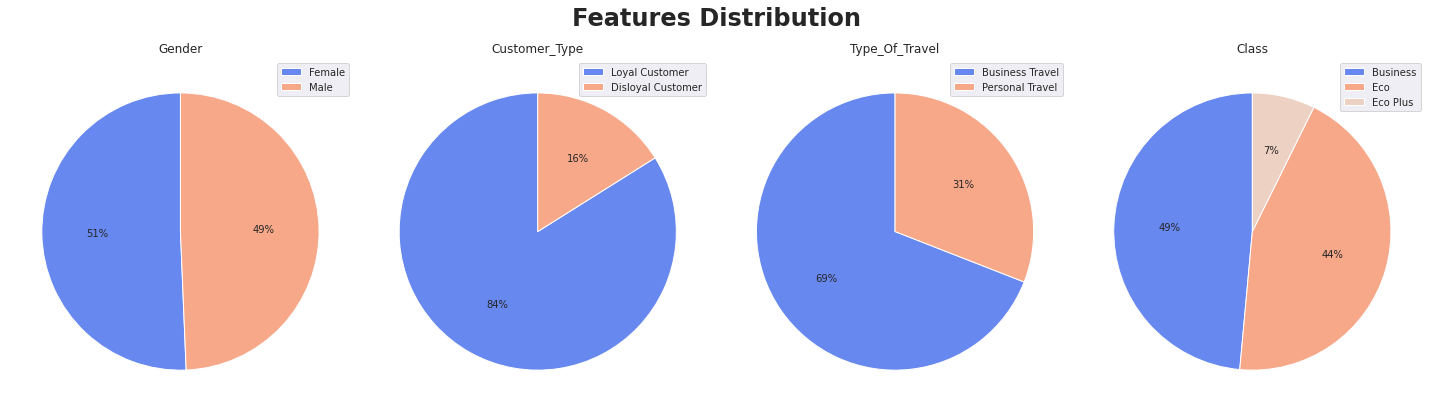

In [ ]:
columns = ['Gender', 'Customer_Type', 'Type_Of_Travel', 'Class']

fig, ax = plt.subplots(1, 4, figsize=(20, 6))

# Loop over the columns and plot each column on a separate axis
for i, col in enumerate(columns):
    labels = explore_df[col].value_counts().index
    values = explore_df[col].value_counts().values
    num_colors = len(values)
    palette_indices = [0, 4, 3]
    colors = [palette[palette_indices[j]] for j in range(num_colors)]
    ax[i].pie(x=values, colors=colors, autopct='%1.0f%%', startangle = 90)
    ax[i].legend(labels=labels, loc='upper right')
    ax[i].set_title(col)

fig.suptitle('Features Distribution', fontsize=24, fontweight='semibold')
fig.tight_layout()
plt.show()

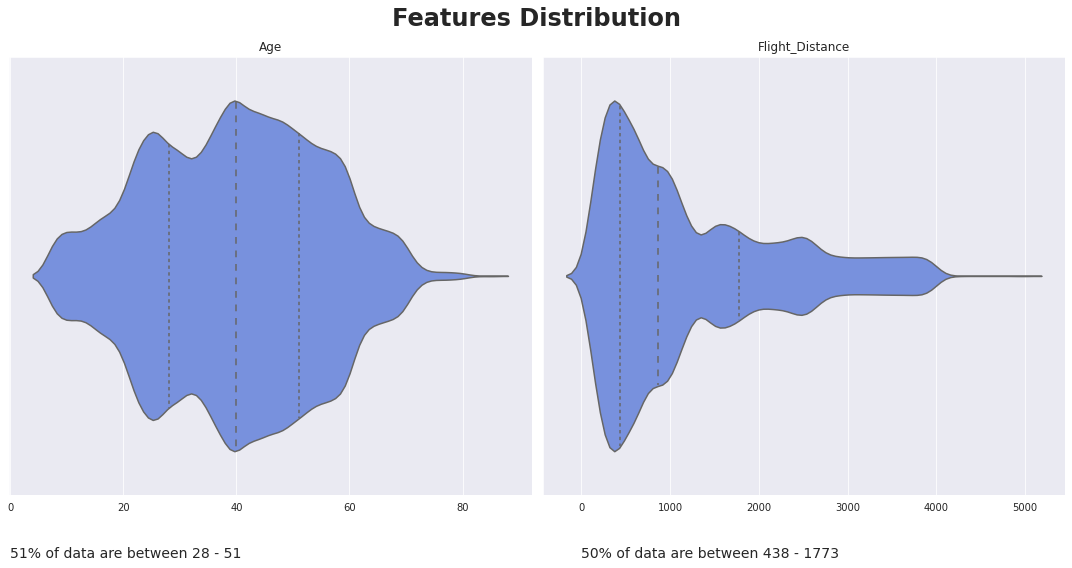

In [ ]:
columns = ['Age', 'Flight_Distance']

fig, ax = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

# Loop over the columns and plot each column on a separate axis
for i, col in enumerate(columns):
    q1 = round(np.percentile(explore_df[col], 25))
    q3 = round(np.percentile(explore_df[col], 75))
    groups = pd.cut(explore_df[col], bins=[q1, q3], include_lowest=True)
    percentage = round((groups.value_counts().values[0] / len(explore_df)) * 100)

    sns.violinplot(data=explore_df, x=col, inner='quart', color=primary, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xlabel('')
    ax[i].text(x=0, y=0.65, s=f'{percentage}% of data are between {q1} - {q3}', fontsize=14, ha='left', va='bottom')

fig.suptitle('Features Distribution', fontsize=24, fontweight='semibold')
fig.tight_layout()
plt.show()

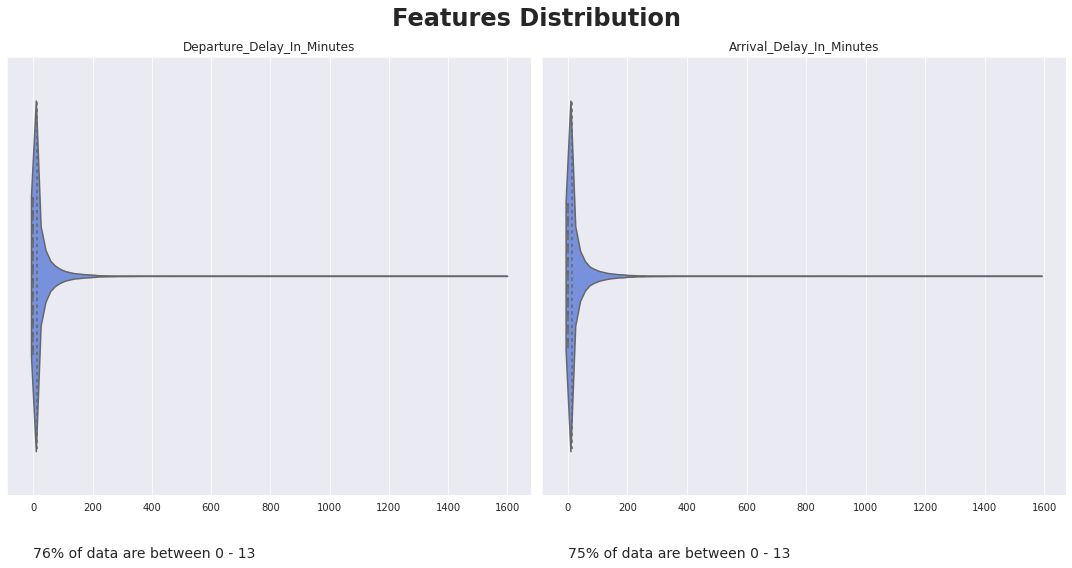

In [ ]:
columns = ['Departure_Delay_In_Minutes', 'Arrival_Delay_In_Minutes']

fig, ax = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

# Loop over the columns and plot each column on a separate axis
for i, col in enumerate(columns):
    q1 = round(np.percentile(explore_df[col], 25))
    q3 = round(np.percentile(explore_df[col], 75))
    groups = pd.cut(explore_df[col], bins=[q1, q3], include_lowest=True)
    percentage = round((groups.value_counts().values[0] / len(explore_df)) * 100)

    sns.violinplot(data=explore_df, x=col, inner='quart', color=primary, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xlabel('')
    ax[i].text(x=0, y=0.65, s=f'{percentage}% of data are between {q1} - {q3}', fontsize=14, ha='left', va='bottom')

fig.suptitle('Features Distribution', fontsize=24, fontweight='semibold')
fig.tight_layout()
plt.show()

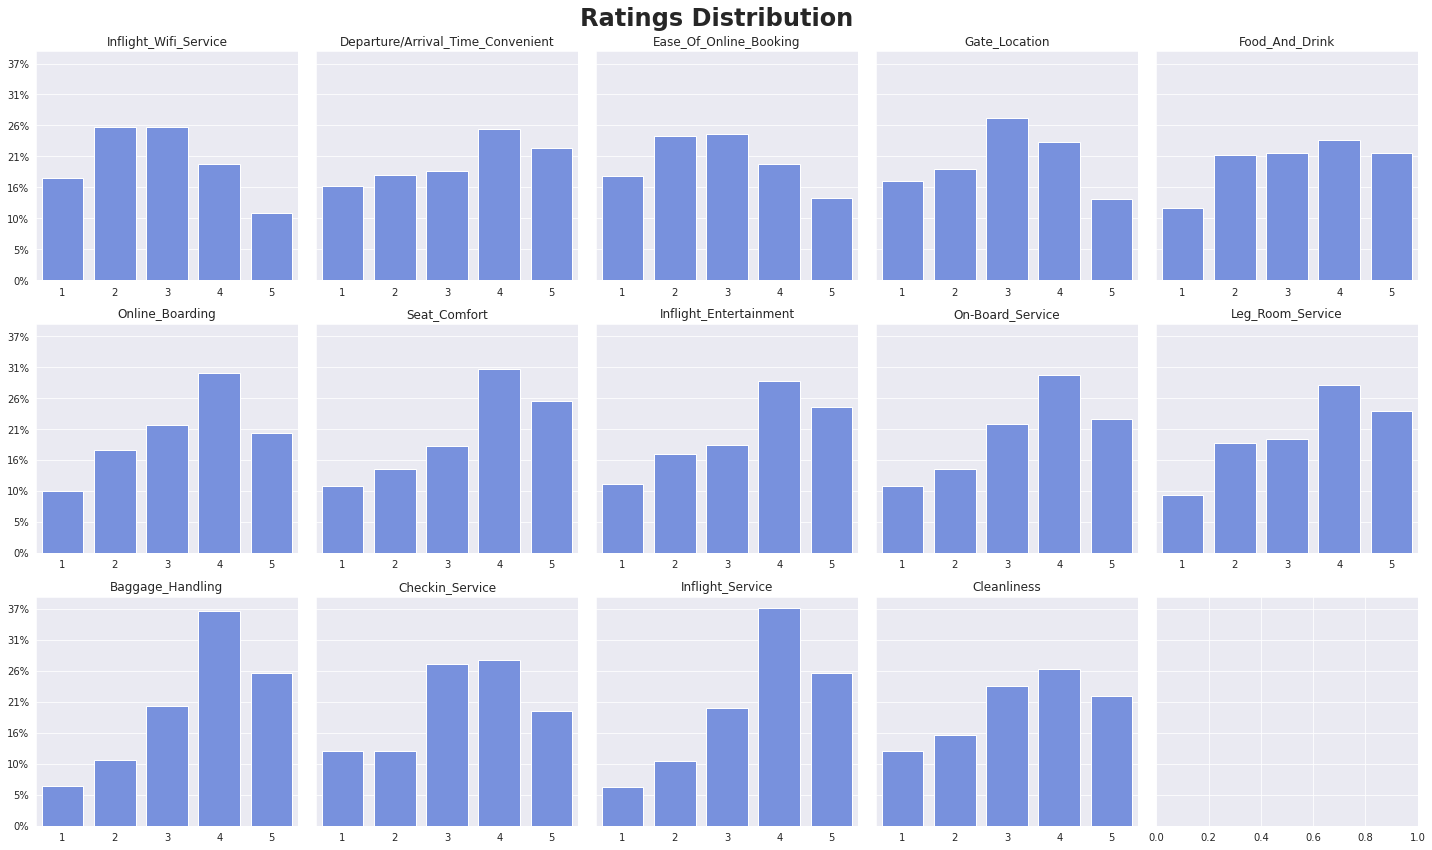

In [ ]:
columns = numeric_features[2:-2]

fig, ax = plt.subplots(3, 5, figsize=(20, 12), sharey=True)
ax = ax.flatten()

# Loop over the columns and plot each column on a separate axis
for i, col in enumerate(columns):
    sns.countplot(data=explore_df, x=col, color=primary, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    
    # Convert y-axis labels to percentage
    total = len(explore_df[col])
    ax[i].yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y/total)))

fig.suptitle('Ratings Distribution', fontsize=24, fontweight='semibold')
fig.tight_layout()
plt.show()

Findings:

- Most of the ratings are up on trend except for `Inflight Wifi Service` and `Ease of Online Booking`

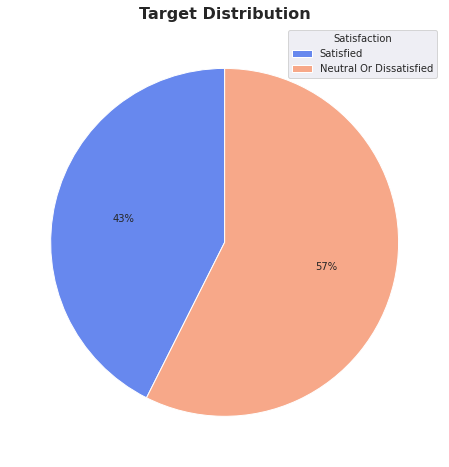

In [ ]:
labels = explore_df['Satisfaction'].value_counts(ascending=True).index
values = explore_df['Satisfaction'].value_counts(ascending=True).values

plt.figure(figsize=(8,8))
plt.pie(x=values, colors=contrast, startangle=90, autopct='%1.0f%%')
plt.legend(title='Satisfaction', labels=labels, loc='upper right')

plt.title('Target Distribution', fontsize=16, fontweight='semibold')
plt.show()

Summary of Data distribution:

- Male & Female are distributed evenly
- 84% of customers are loyal customer
- 69% of customers are travaling on business purposes
- 49% customers are travaling on business class, 44% are on economy class, and 7% are on economy plus
- `Inflight Wifi Service` and `Ease of Online Booking` are need to be improved since a lot of people are give 3 or less on ratings

2.How the features correlated?

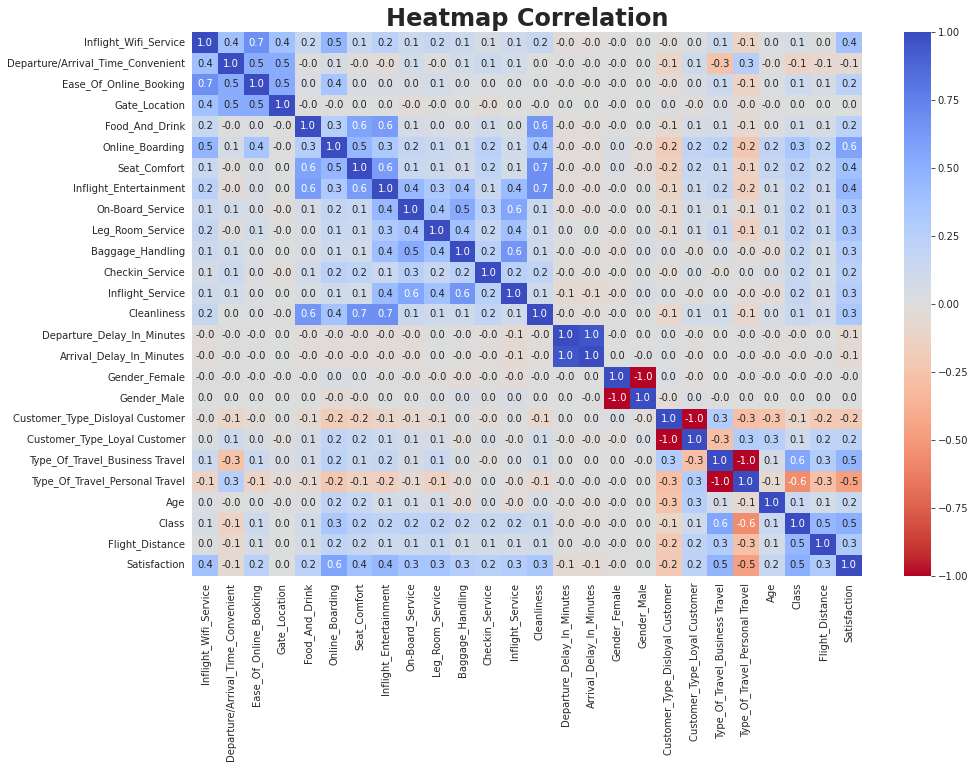

In [ ]:
corr = train_df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='coolwarm_r', fmt='.1f')
plt.title('Heatmap Correlation', fontsize=24, fontweight='semibold')
plt.show()

In [ ]:
# Group list of features based on their category
rating_features = list(df.loc[:, 'Inflight_Wifi_Service':'Cleanliness'])
main_features = list(df.loc[:,'Departure_Delay_In_Minutes':'Flight_Distance'])

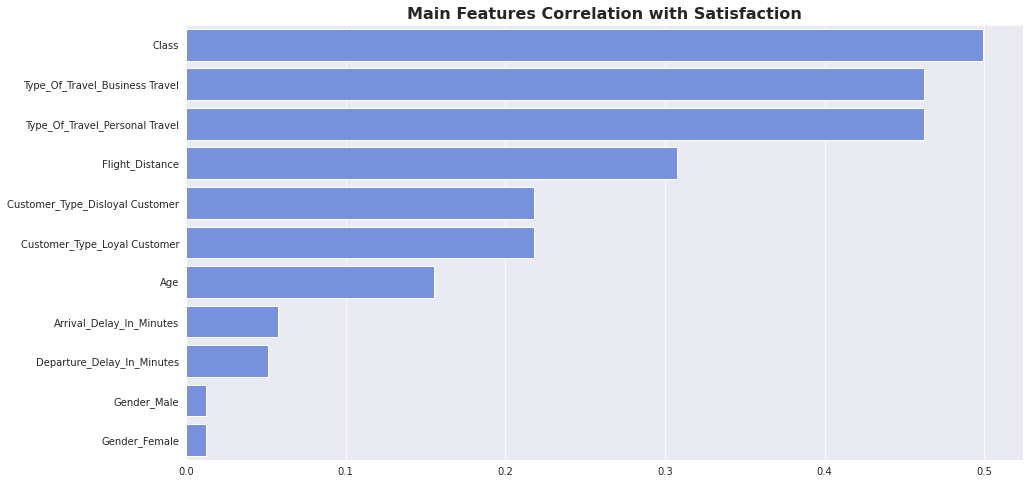

In [ ]:
main_corr = corr.loc['Satisfaction', main_features].abs().sort_values(ascending=False)

plt.figure(figsize=(15, 8))

sns.barplot(x=main_corr.values, y=main_corr.index, color=primary)

plt.title('Main Features Correlation with Satisfaction', fontsize=16, fontweight='semibold')
plt.show()

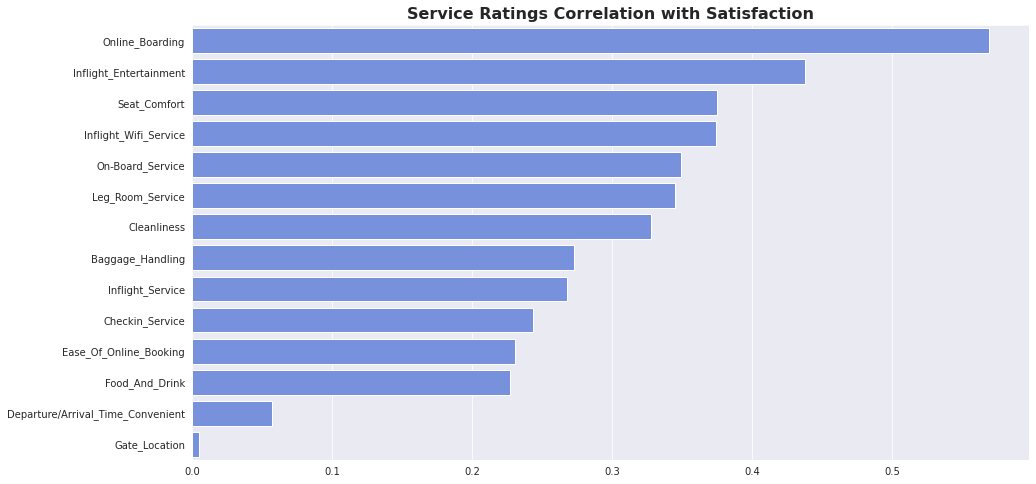

In [ ]:
ratings_corr = corr.loc['Satisfaction', rating_features].abs().sort_values(ascending=False)

plt.figure(figsize=(15, 8))

sns.barplot(x=ratings_corr.values, y=ratings_corr.index, color=primary)

plt.title('Service Ratings Correlation with Satisfaction', fontsize=16, fontweight='semibold')
plt.show()

Summary of features correlation:

Top 3 main features that are correlated with satisfaction:
1. Cabin Class
2. Type of Travel
3. Flight Distance

Top 3 service ratings that are correlated with satisfaction:
1. Online Boarding
2. Inflight Entertainment
3. Seat Comfort

3.How features distributed by satisfaction?

In [ ]:
# Set up the order of satisfaction
satisfaction = ['Satisfied', 'Neutral Or Dissatisfied']

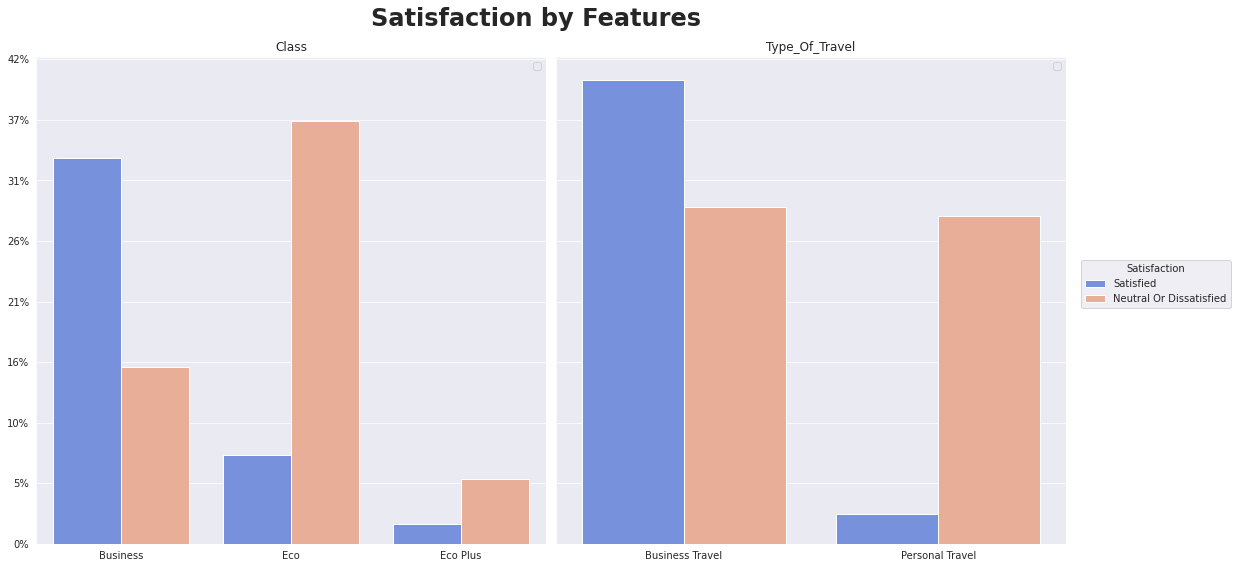

In [ ]:
columns = ['Class', 'Type_Of_Travel']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 8), sharey=True)

# Loop over the columns and plot each column on a separate axis
for i, col in enumerate(columns):
    sns.countplot(data=explore_df, x=col, hue='Satisfaction', hue_order=satisfaction, palette=contrast, ax=ax[i])
    ax[i].legend('')
    ax[i].set_title(col)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')

    # Convert y-axis labels to percentage
    total = len(explore_df[col])
    ax[i].yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y/total)))

fig.legend(title='Satisfaction', labels=satisfaction, loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle('Satisfaction by Features', fontsize=24, fontweight='semibold')
fig.tight_layout()
plt.show()

In [ ]:
explore_df.groupby(['Class', 'Satisfaction'])\
    .size()\
    .groupby(level=0)\
    .apply(lambda x: round(100 * x / float(x.sum())))\
    .reset_index(name='Percentage')

,Class,Satisfaction,Percentage
0,Business,Neutral Or Dissatisfied,32.0
1,Business,Satisfied,68.0
2,Eco,Neutral Or Dissatisfied,83.0
3,Eco,Satisfied,17.0
4,Eco Plus,Neutral Or Dissatisfied,77.0
5,Eco Plus,Satisfied,23.0


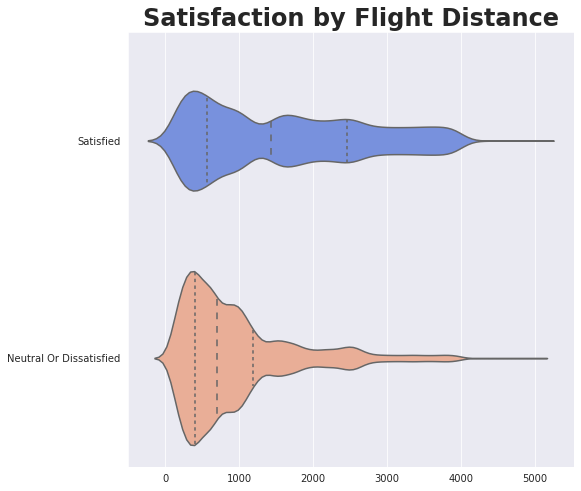

In [ ]:
plt.figure(figsize=(8, 8))

ax = sns.violinplot(data=explore_df, x='Flight_Distance', y='Satisfaction', order=satisfaction, inner='quart', palette=contrast)
ax.set_title(col)
ax.set_xlabel('')
ax.set_ylabel('')

plt.title('Satisfaction by Flight Distance', fontsize=24, fontweight='semibold')
plt.show()

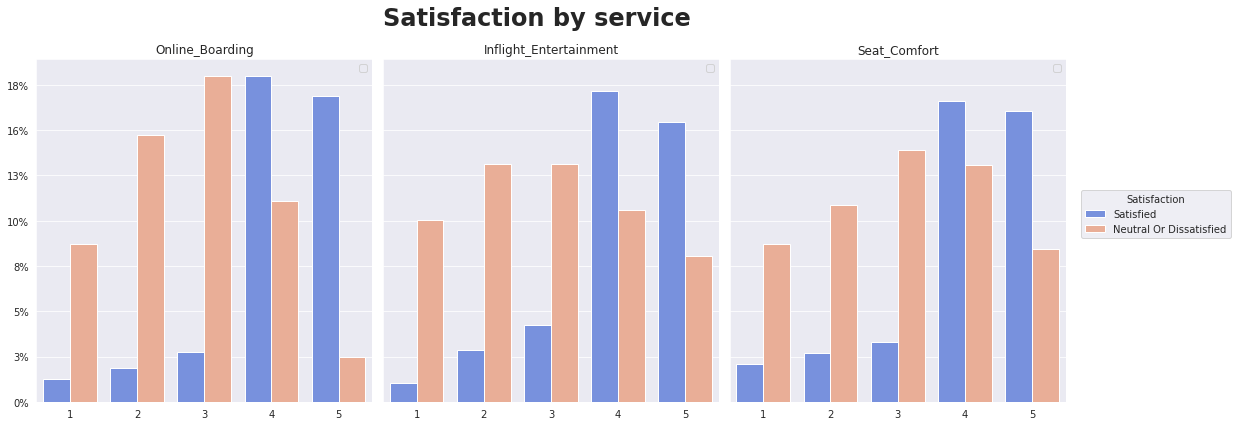

In [ ]:
columns = ['Online_Boarding', 'Inflight_Entertainment', 'Seat_Comfort']

fig, ax = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
ax = ax.flatten()

# Loop over the columns and plot each column on a separate axis
for i, col in enumerate(columns):
    sns.countplot(data=explore_df, x=col, hue='Satisfaction', hue_order=satisfaction, palette=contrast, ax=ax[i])
    ax[i].legend('')
    ax[i].set_title(col)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    # Convert y-axis labels to percentage
    total = len(explore_df[col])
    ax[i].yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y/total)))

fig.legend(title='Satisfaction', labels=satisfaction, loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle('Satisfaction by service', fontsize=24, fontweight='semibold')
fig.tight_layout()
plt.show()

Summary of satisfaction distribution:

- People who flight with economy class or on personal travel are mostly Neutral or Dissatisfied
- People who flight with business class or on bisniss travel are mostly satisfied
- A lot of customer who are Neutral or Dissatisfied are come from short flight distance
- Satisfaction seems very consistent accross ratings where customer who give a rating 5 are satisfied and people who give rating 3 or less are Neutral or Dissatisfied

4.How ratings distributed on Eco Class?

In [ ]:
eco_filter = explore_df.query('Class == "Eco"')

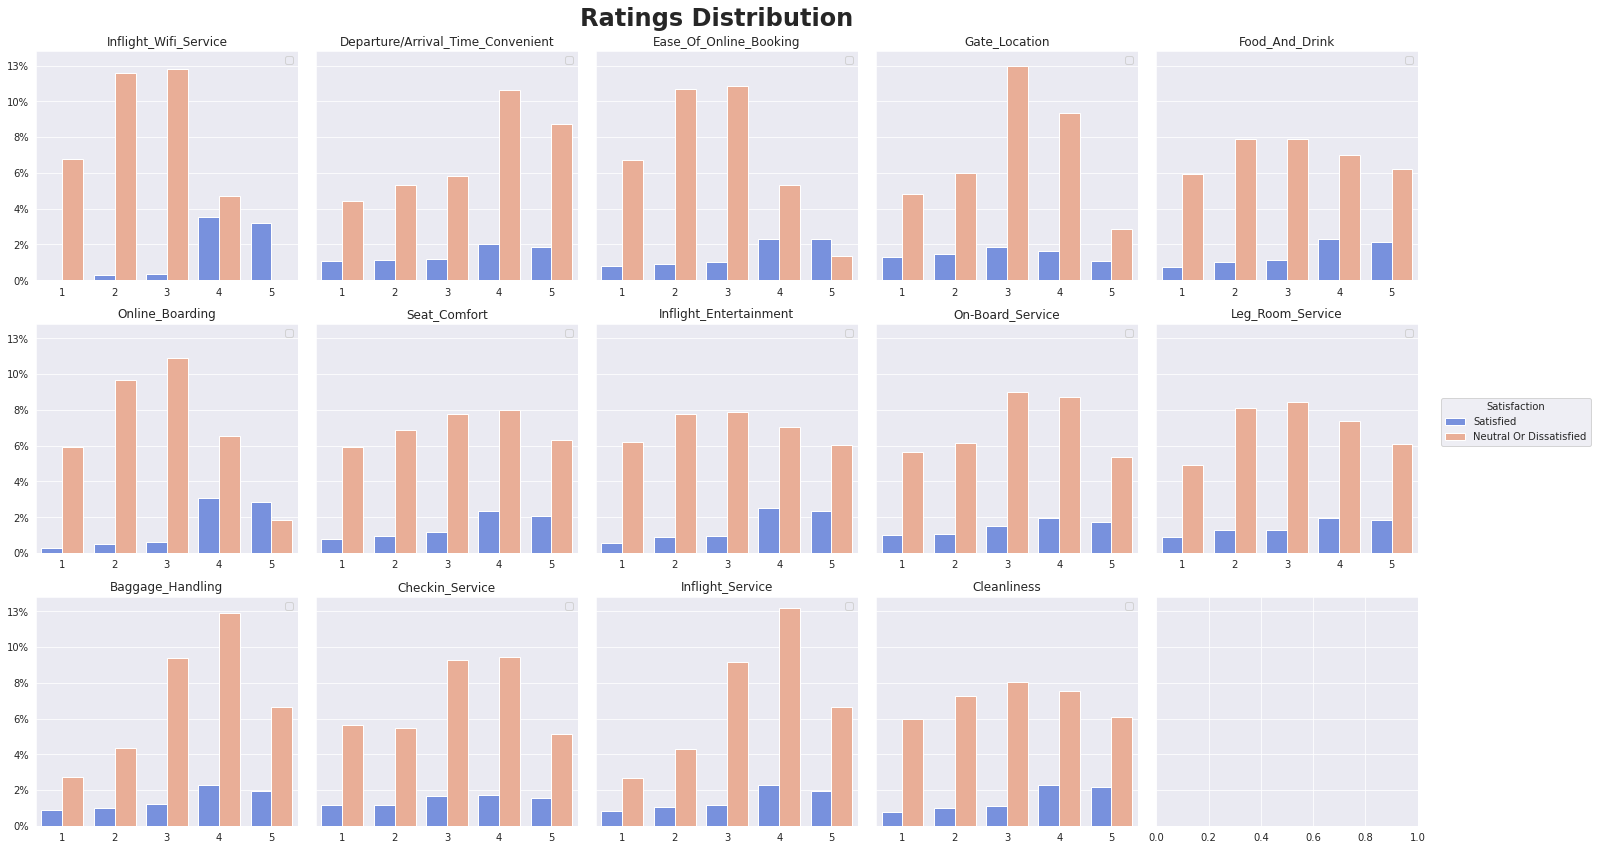

In [ ]:
columns =rating_features

fig, ax = plt.subplots(3, 5, figsize=(20, 12), sharey=True)
ax = ax.flatten()

# Loop over the columns and plot each column on a separate axis
for i, col in enumerate(columns):
    sns.countplot(data=eco_filter, x=col, hue='Satisfaction', hue_order=satisfaction, palette=contrast, ax=ax[i])
    ax[i].legend('')
    ax[i].set_title(col)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    # Convert y-axis labels to percentage
    total = len(explore_df[col])
    ax[i].yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y/total)))

fig.legend(title='Satisfaction', labels=satisfaction, loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle('Ratings Distribution', fontsize=24, fontweight='semibold')
fig.tight_layout()
plt.show()

5.How ratings distributed on Personal Travel?

In [ ]:
personal_filter = explore_df.query('Type_Of_Travel == "Personal Travel"')

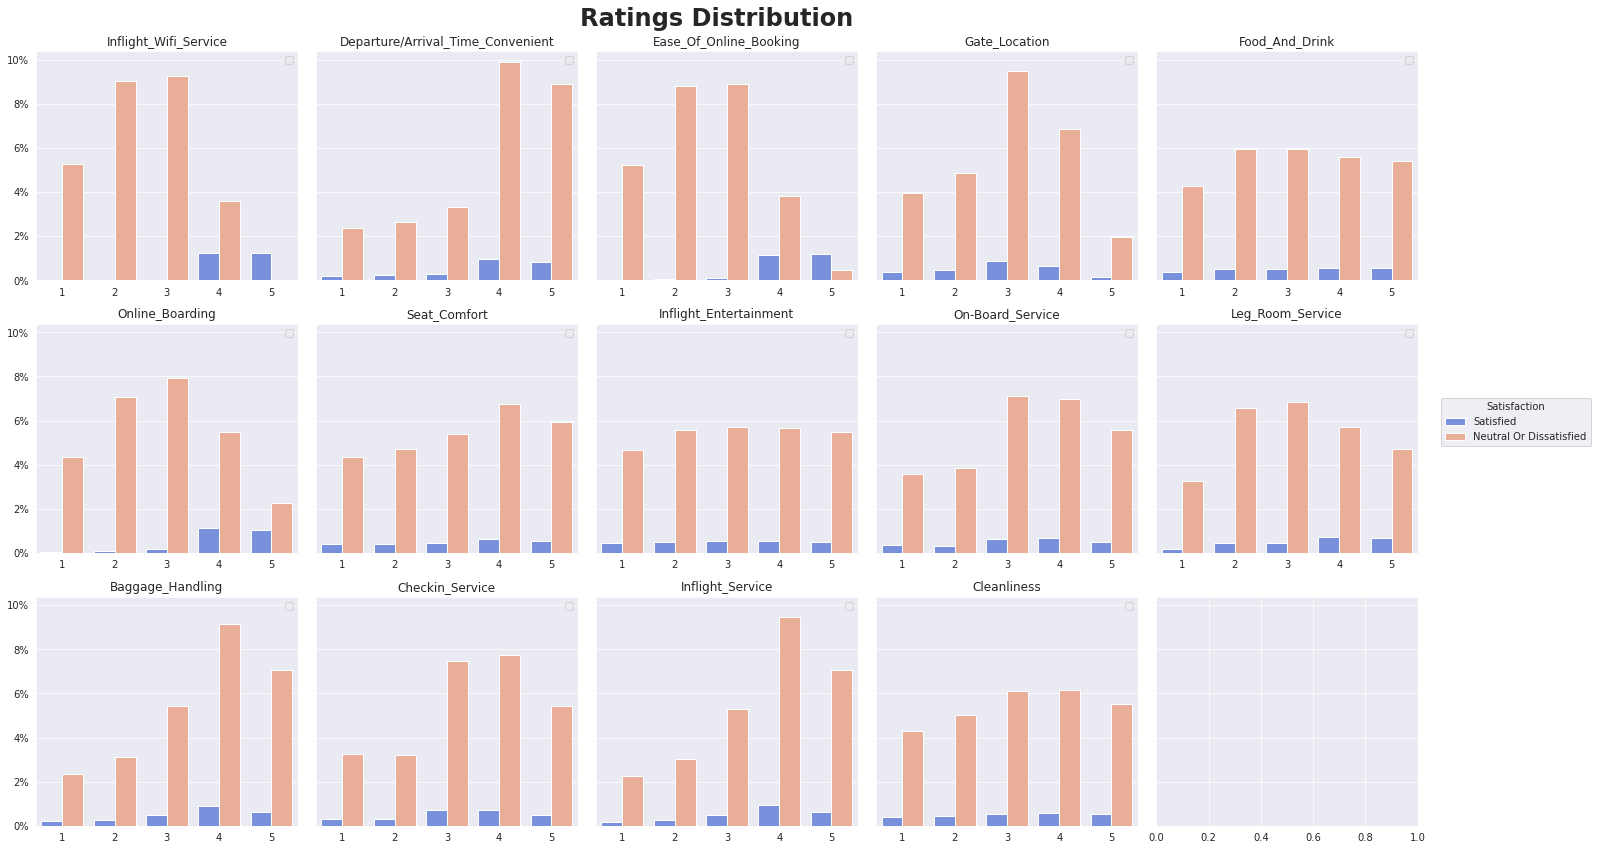

In [ ]:
columns =rating_features

fig, ax = plt.subplots(3, 5, figsize=(20, 12), sharey=True)
ax = ax.flatten()

# Loop over the columns and plot each column on a separate axis
for i, col in enumerate(columns):
    sns.countplot(data=personal_filter, x=col, hue='Satisfaction', hue_order=satisfaction, palette=contrast, ax=ax[i])
    ax[i].legend('')
    ax[i].set_title(col)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    # Convert y-axis labels to percentage
    total = len(explore_df[col])
    ax[i].yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y/total)))

fig.legend(title='Satisfaction', labels=satisfaction, loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle('Ratings Distribution', fontsize=24, fontweight='semibold')
fig.tight_layout()
plt.show()

## Step 4: Train Model

<h3>4.1 Split data into X and y variables

In [ ]:
X = train_df.drop(columns=['Satisfaction'])
y = train_df['Satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h3>4.2 Find the best algorithm</h3>

In [ ]:
# Initialize algorithms
gbc = GradientBoostingClassifier()
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()
svc = SVC()

algorithms = [gbc, rfc, knn, svc]

In [ ]:
# Initialize variables to store results of loop
results = []

# Using loop to evaluate each algorithm
for algorithm in algorithms:
    algorithm.fit(X_train, y_train)
    y_pred = algorithm.predict(X_test)
    results.append({
        'Algorithm': type(algorithm).__name__,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1_score': f1_score(y_test, y_pred)
    })

# Store the result into a data frame
result = pd.DataFrame(results, columns=['Algorithm', 'Accuracy', 'Precision', 'Recall', 'F1_score'])

result = result.sort_values('Accuracy', ascending=False, ignore_index=True)

In [ ]:
result

,Algorithm,Accuracy,Precision,Recall,F1_score
0,RandomForestClassifier,0.963638,0.973883,0.939252,0.956254
1,SVC,0.953085,0.956164,0.931843,0.943847
2,GradientBoostingClassifier,0.946398,0.951833,0.919867,0.935577
3,KNeighborsClassifier,0.937516,0.951235,0.898383,0.924054


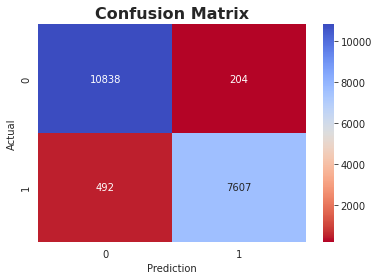

In [ ]:
y_pred = rfc.predict(X_test)
heatmap = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap='coolwarm_r')
heatmap.set_xlabel('Prediction')
heatmap.set_ylabel('Actual')
plt.title('Confusion Matrix', fontdict={'fontsize': 16, 'fontweight' : 'semibold'})
plt.show()

<h3>Summary of step 4:</h3>

- Split X and Y variable
- Best algorithm for our spesific dataset is Random Forrest Classifier with 96.3% accuracy score

## Step 5: Test Model

<h3>5.1 Predict test data using the best algorithm</h3>

In [ ]:
X_test = test_df.drop(columns=['Satisfaction'])
y_test = test_df['Satisfaction']

In [ ]:
y_pred = rfc.predict(X_test)

scores = [{'Score': accuracy_score(y_test, y_pred)},
          {'Score': precision_score(y_test, y_pred)},
          {'Score': recall_score(y_test, y_pred)},
          {'Score': f1_score(y_test, y_pred)}]

metrices = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Store the result into a data frame
rfc_result = pd.DataFrame(index=metrices, data=scores)

In [ ]:
rfc_result

,Score
Accuracy,0.962620
Precision,0.972594
Recall,0.939648
F1-score,0.955837


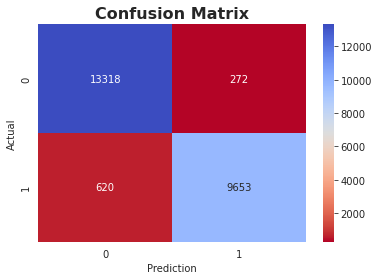

In [ ]:
heatmap = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap='coolwarm_r')
heatmap.set_xlabel('Prediction')
heatmap.set_ylabel('Actual')
plt.title('Confusion Matrix', fontdict={'fontsize': 16, 'fontweight' : 'semibold'})
plt.show()

# Author

**Refnhaldy Kristian** created this notebook as part of portfolio project.

- <a href='https://www.linkedin.com/in/refnhaldykristian/'>Linkedin</a>
- <a href='https://github.com/refnhaldy'>Github</a>